In [3]:
#!pip install wordcloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_json("./mieszkania_OLX_10.json")
df.sample(20)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1194 entries, title to 1193
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   1194 non-null   object 
 1   city    1194 non-null   object 
 2   price   1194 non-null   float64
 3   area    1194 non-null   float64
dtypes: float64(2), object(2)
memory usage: 46.6+ KB


In [7]:
#dodanie kolumny z ceną za m2
df['cena m2']=df['price']/df['area'].round(2)
df.sample(20)

,title,city,price,area,cena m2
987,4 pokoje! Okazyjna cena! Świetna inwestycja,Białystok,425000.0,53.40,7958.801498
1180,Sprzedam mieszkanie,Suwałki,380000.0,53.00,7169.811321
1166,Mieszkanie 3 pokoje z oddzielną kuchnią-ul. Falka,Suwałki,399000.0,68.70,5807.860262
923,"Sprzedam mieszkanie 77,5 m2, zadbane, klimatyz...",Białystok,490000.0,77.50,6322.580645
300,Sprzedam Mieszkanie 60m2.os.centrum11.grajewo,Grajewo,290000.0,59.90,4841.402337
995,Sprzedam mieszkanie 72.98m2 Osiedle Centrum,Grajewo,430000.0,72.98,5892.025212
1165,"Mieszkanie na II piętrze w dobrej cenie! 48,2m2",Białystok,379000.0,48.20,7863.070539
103,Trzypokojowe mieszkanie przy ul. Rumiankowej,Białystok,335000.0,61.60,5438.311688
419,"Mieszkanie 3-pokojowe - Rozkład, Centrum, Balkon",Suwałki,269000.0,48.17,5584.388624
119,"Mieszkanie 2-pokojowe- wyposażone, nowy blok M...",Białystok,348000.0,28.58,12176.347096


In [8]:
df.describe()

,price,area,cena m2
count,1.194000e+03,1194.000000,1194.000000
mean,4.116560e+05,53.661583,7824.144594
std,1.620467e+05,18.229138,1974.264299
min,5.900000e+04,20.350000,2021.276596
25%,3.190000e+05,42.000000,6449.085726
50%,3.850000e+05,52.825000,7738.607051
75%,4.686750e+05,61.570000,8948.668911
max,1.505100e+06,174.000000,16210.322268


In [9]:
#wyświetlić dane najtańszego mieszkania
temp = df.sort_values('price')
temp.head(10)

,title,city,price,area,cena m2
756,"Kawalerka w Łapach, parter, do gruntownego rem...",Łapy,59000.0,27.60,2137.681159
1192,Mieszkanie dwa pokoje Krzysztoforowo,Krzysztoforowo,95000.0,47.00,2021.276596
812,Mieszkanie bezczynszowe Krynki z garażem,Krynki,100000.0,49.20,2032.520325
373,Kawalerka w Czarnej Białostockiej * Do remontu,Czarna,120000.0,26.00,4615.384615
330,Sprzedam mieszkanie kawalerka Grajewo,Grajewo,129000.0,25.00,5160.000000
1089,Mieszkanie 2-pokojowe; II piętro; 41m2; Wyszki,Wyszki,139000.0,41.00,3390.243902
981,Mieszkanie w bloku,Łomża,140000.0,65.00,2153.846154
893,"Lokal mieszkalny na poddaszu, 36 m2, Łomża",Łomża,140000.0,36.63,3822.003822
383,Niska Cena - Kawalerka z dużym Potencjałem,Czarna,141000.0,25.00,5640.000000
942,"Mieszkanie 34m2, parter",Goniądz,145000.0,34.00,4264.705882


In [1]:
plt.figure(figsize=(18,9))
x = df.city  # wartości na osi x
y = df["cena m2"]  # wartości na osi y

plt.bar(x, y)
plt.figure()
plt.xticks(rotation = 45)

bp = df.boxplot()

#df.plot.barh(stacked=True);

NameError: name 'plt' is not defined

###Aktywność w poszczególnych miastach

<AxesSubplot:xlabel='city'>

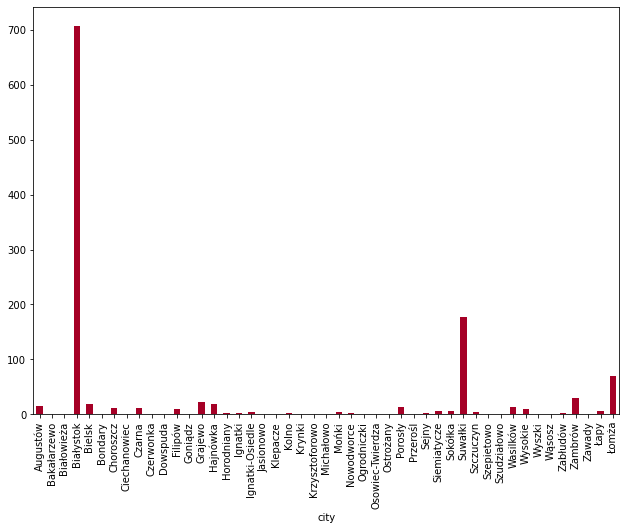

In [11]:
df.groupby("city") \
    .count()["title"] \
    .plot.bar(figsize=(10.5, 7.5), cmap="RdYlGn")

<AxesSubplot:ylabel='city'>

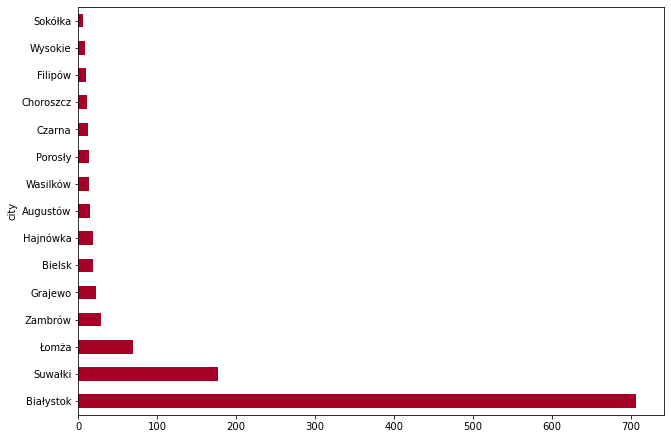

In [107]:
#ilość ogłoszeń dla poszczególnych miast
df.groupby("city") \
    .count()["title"] \
    .sort_values(ascending=False) \
    .head(n=15) \
    .plot.barh(figsize=(10.5, 7.5), cmap="RdYlGn")

C:\Users\user\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


city
Augustów            AxesSubplot(0.125,0.125;0.775x0.755)
Bakałarzewo         AxesSubplot(0.125,0.125;0.775x0.755)
Białowieża          AxesSubplot(0.125,0.125;0.775x0.755)
Białystok           AxesSubplot(0.125,0.125;0.775x0.755)
Bielsk              AxesSubplot(0.125,0.125;0.775x0.755)
Bondary             AxesSubplot(0.125,0.125;0.775x0.755)
Choroszcz           AxesSubplot(0.125,0.125;0.775x0.755)
Ciechanowiec        AxesSubplot(0.125,0.125;0.775x0.755)
Czarna              AxesSubplot(0.125,0.125;0.775x0.755)
Czerwonka           AxesSubplot(0.125,0.125;0.775x0.755)
Dowspuda            AxesSubplot(0.125,0.125;0.775x0.755)
Filipów             AxesSubplot(0.125,0.125;0.775x0.755)
Goniądz             AxesSubplot(0.125,0.125;0.775x0.755)
Grajewo             AxesSubplot(0.125,0.125;0.775x0.755)
Hajnówka            AxesSubplot(0.125,0.125;0.775x0.755)
Horodniany          AxesSubplot(0.125,0.125;0.775x0.755)
Ignatki             AxesSubplot(0.125,0.125;0.775x0.755)
Ignatki-Osiedle     AxesSu

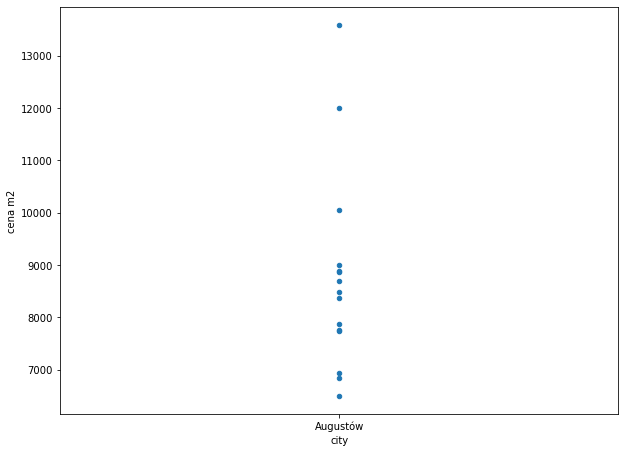

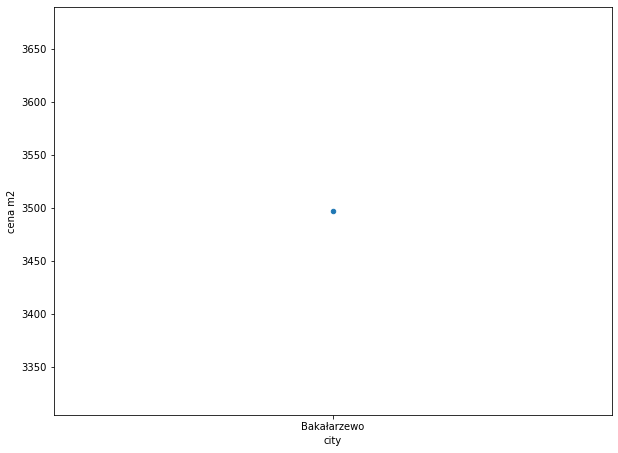

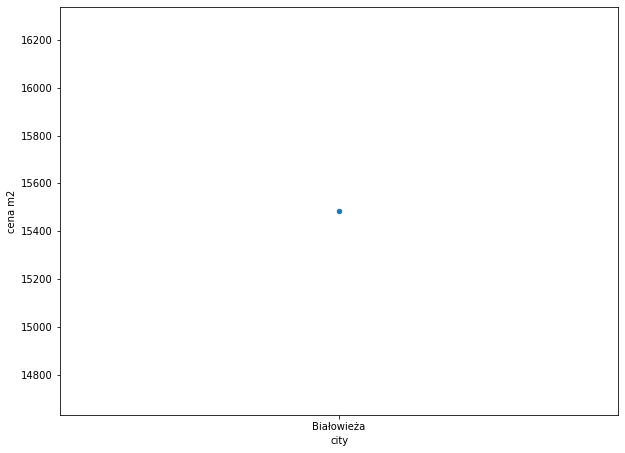

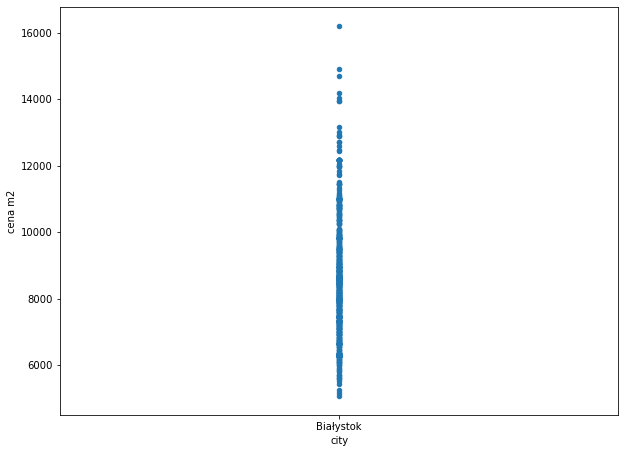

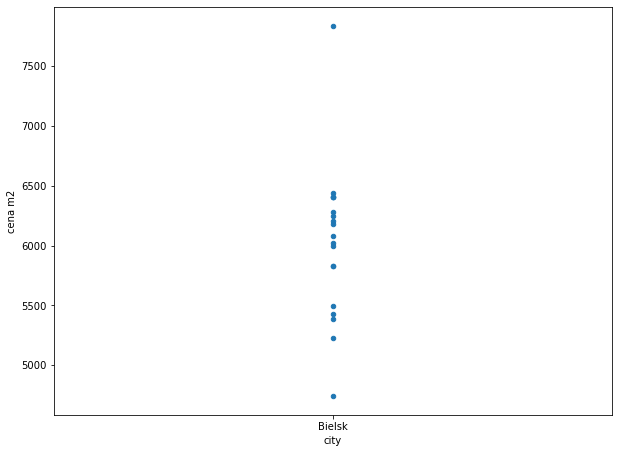

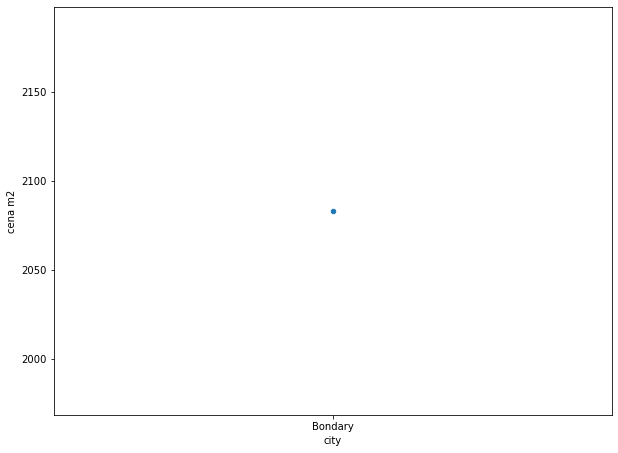

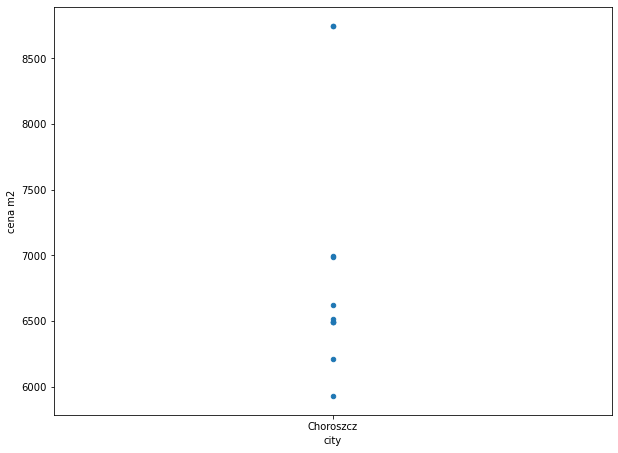

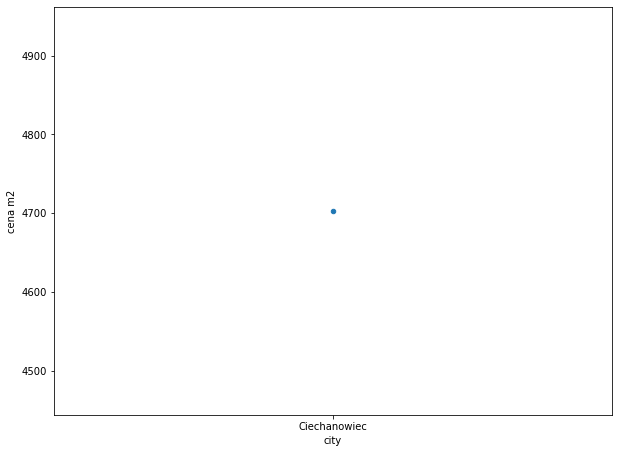

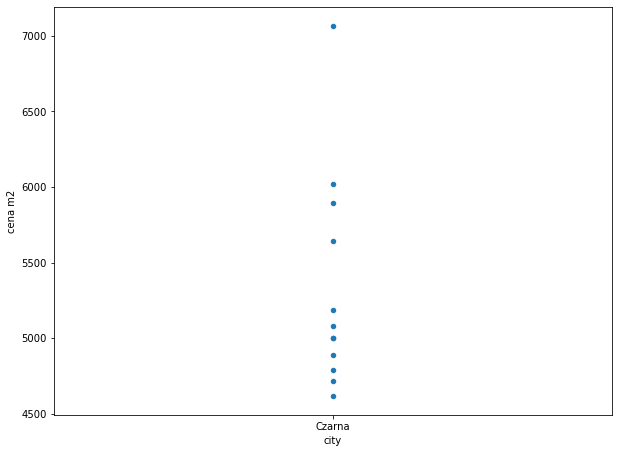

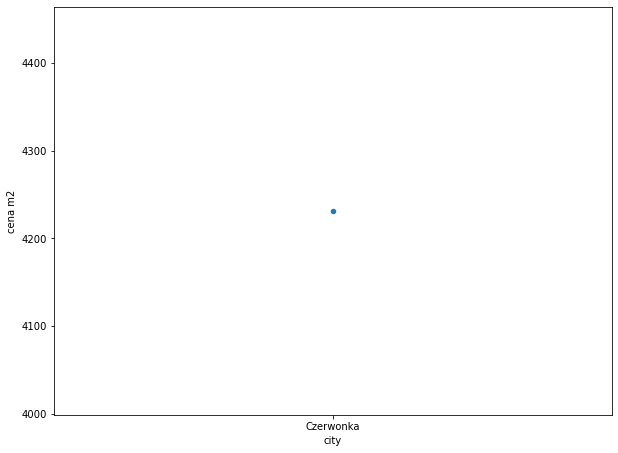

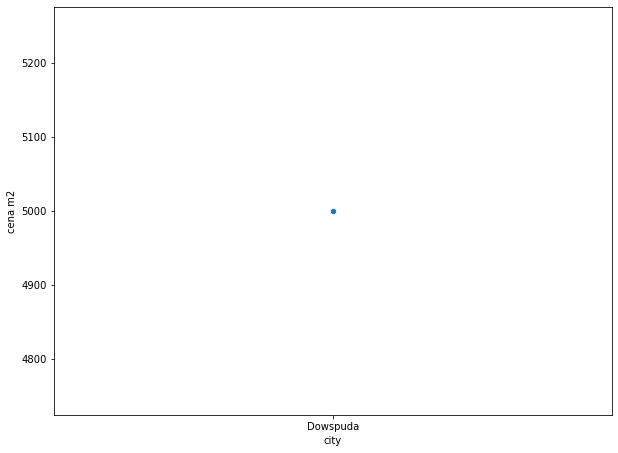

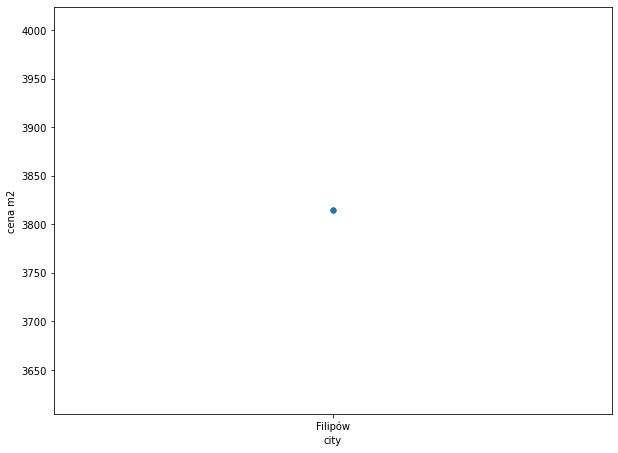

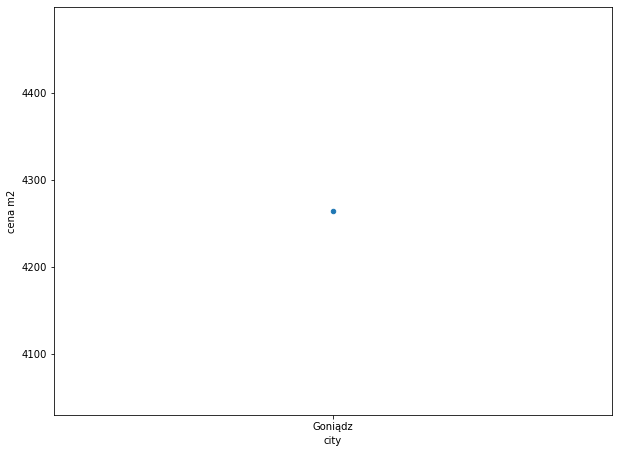

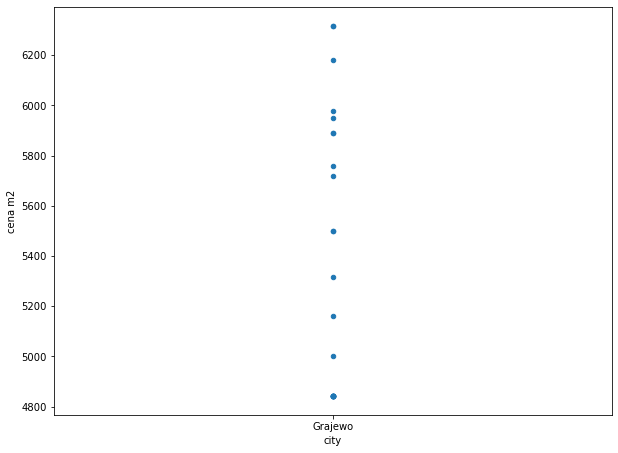

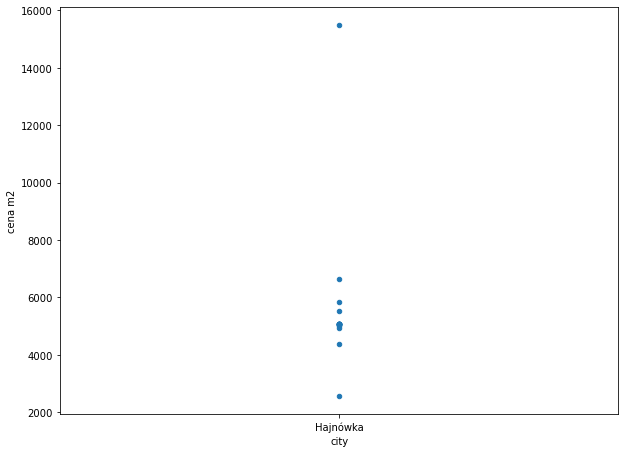

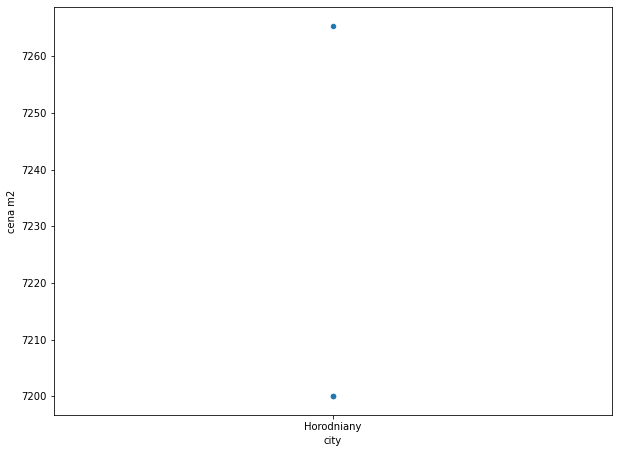

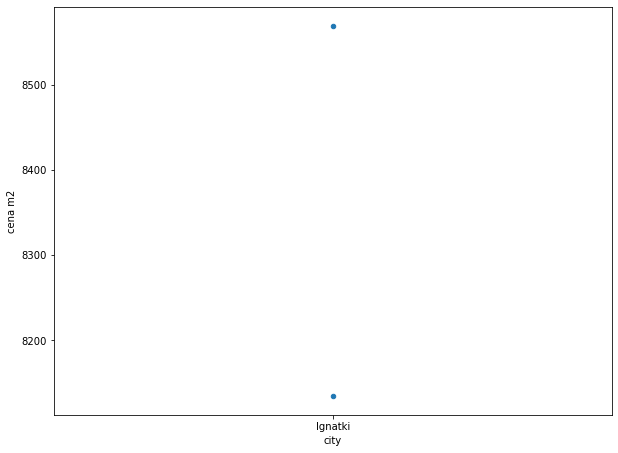

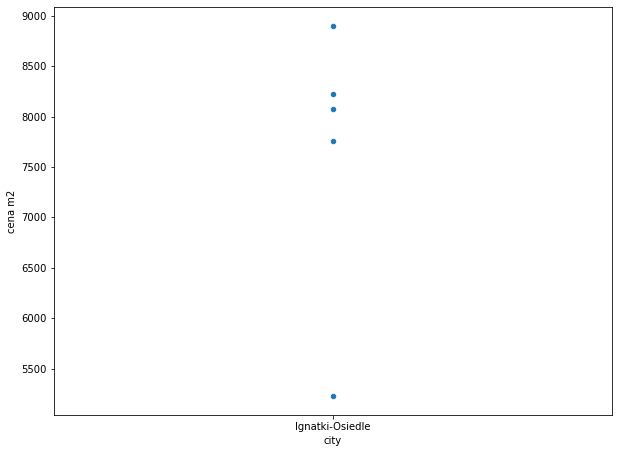

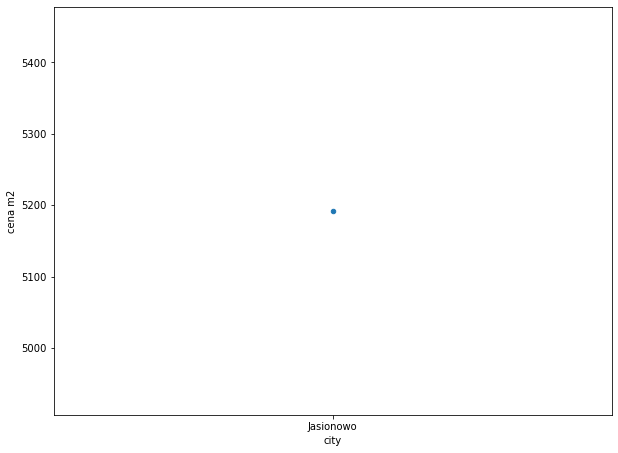

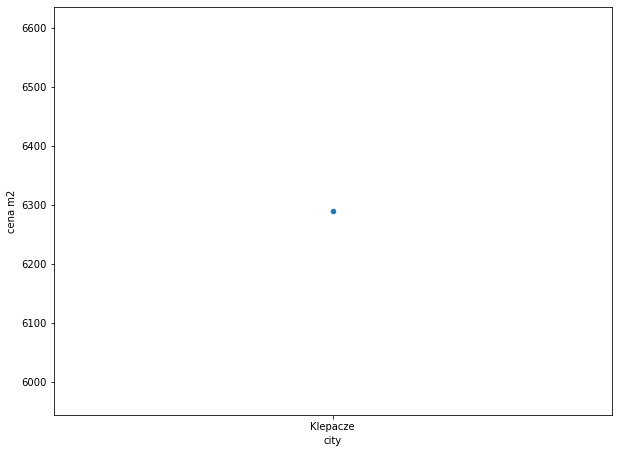

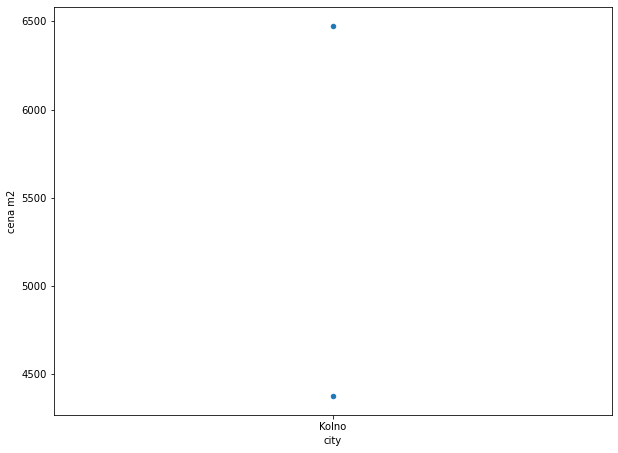

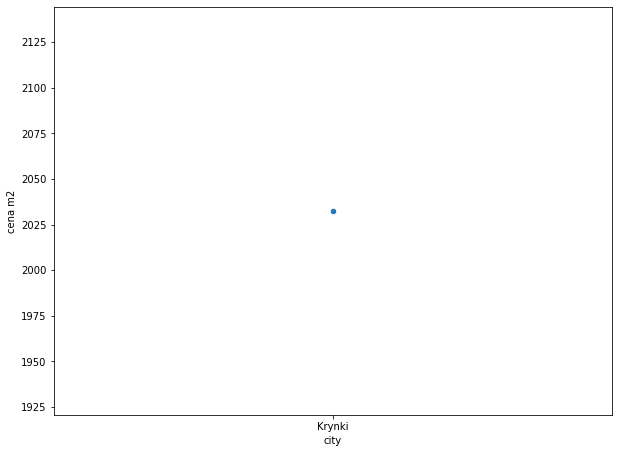

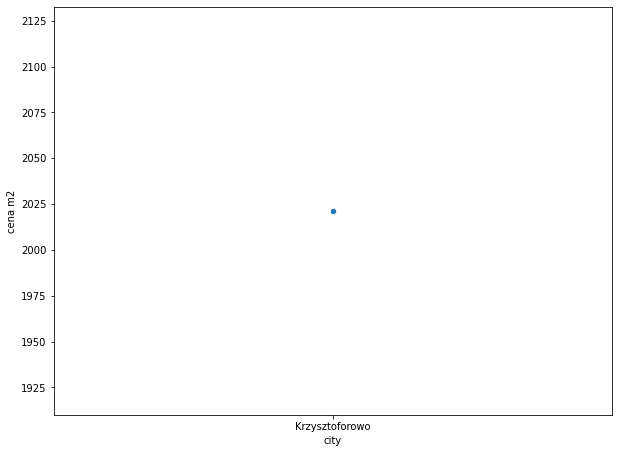

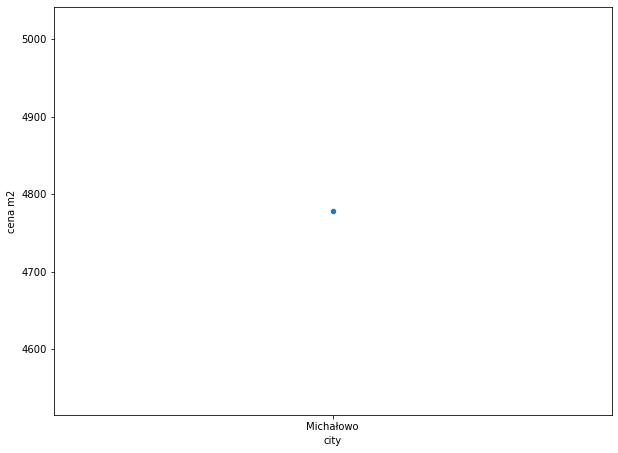

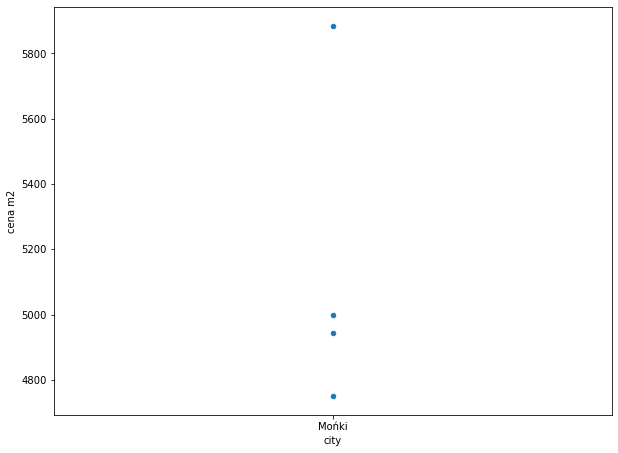

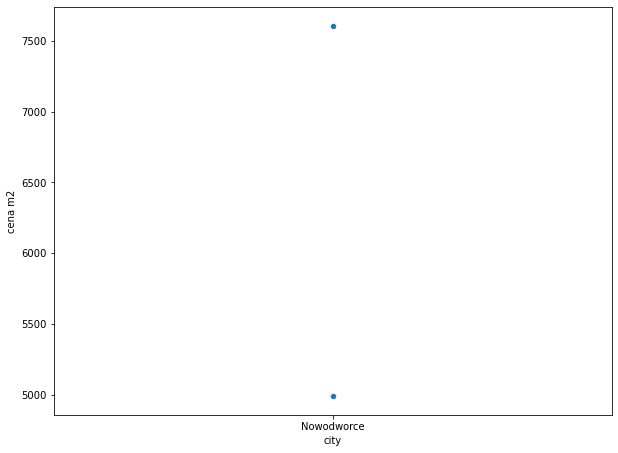

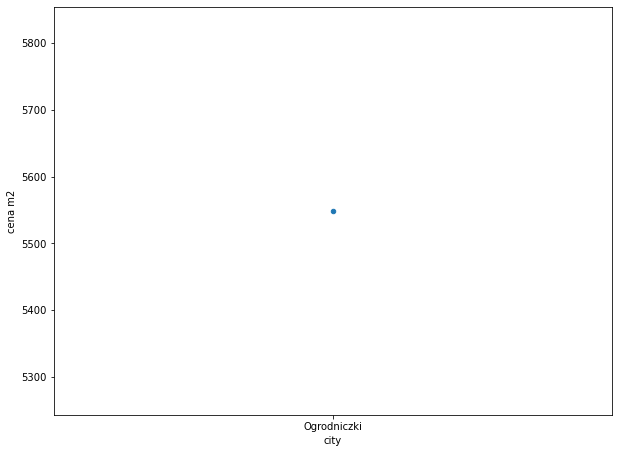

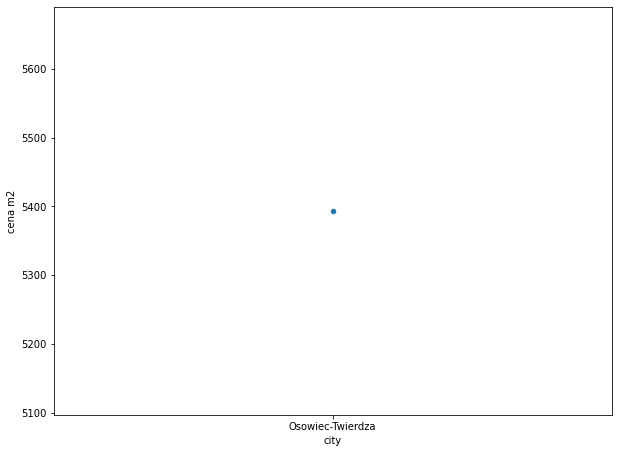

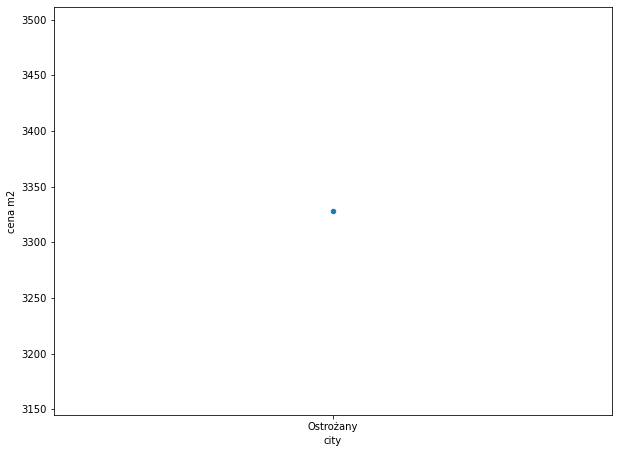

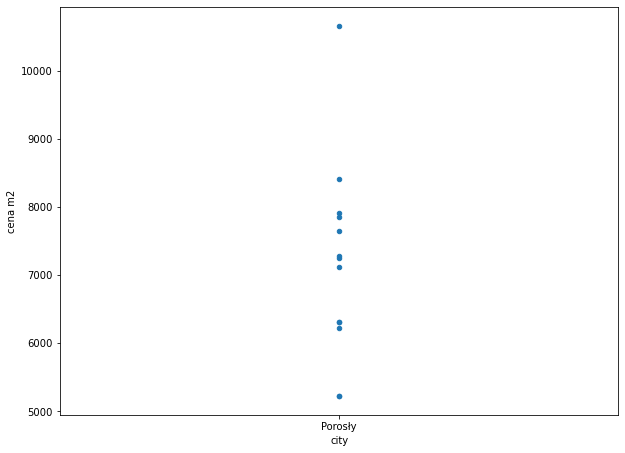

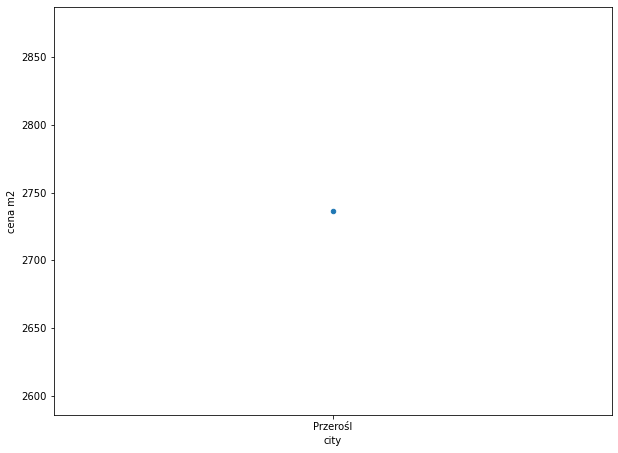

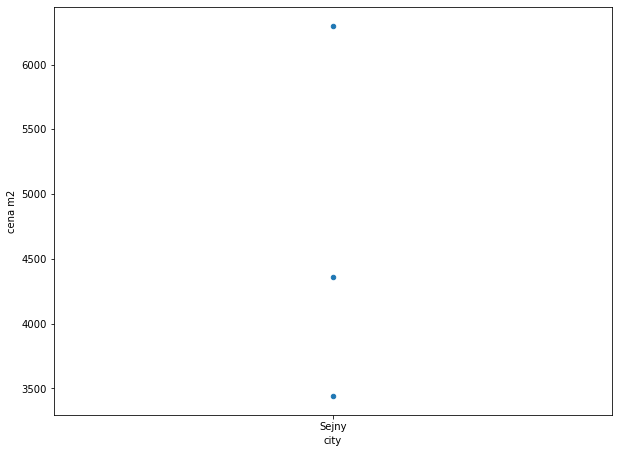

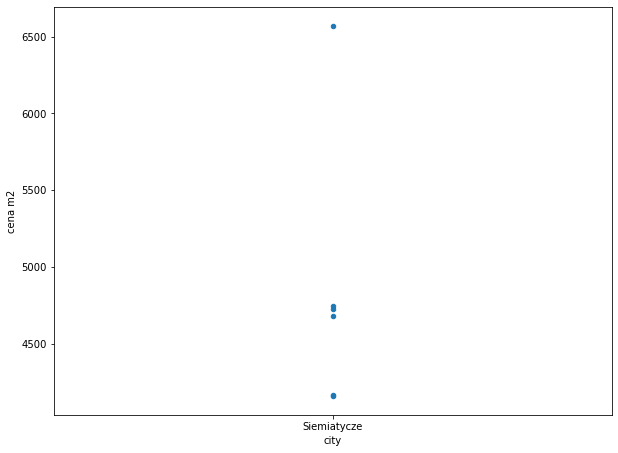

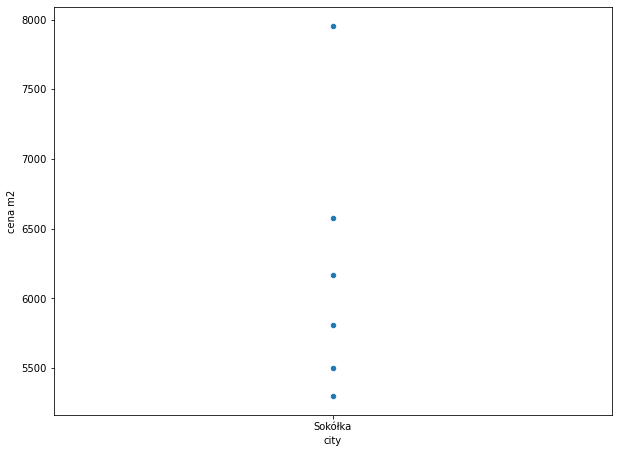

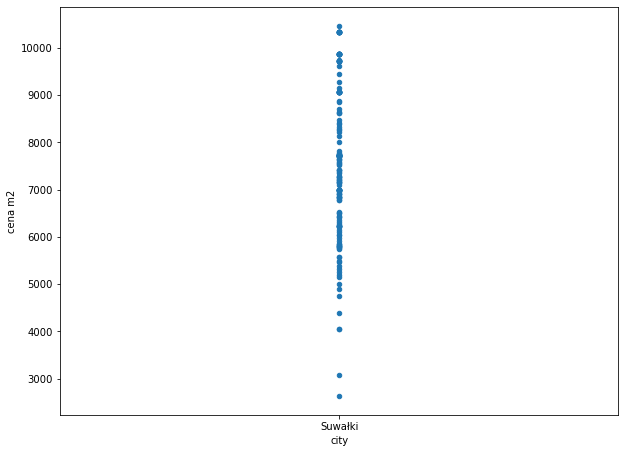

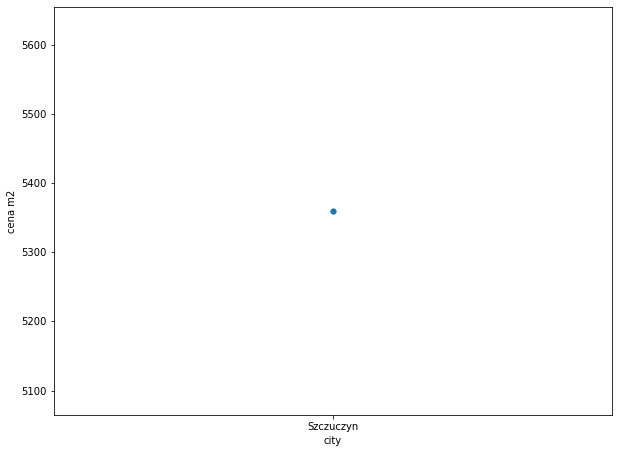

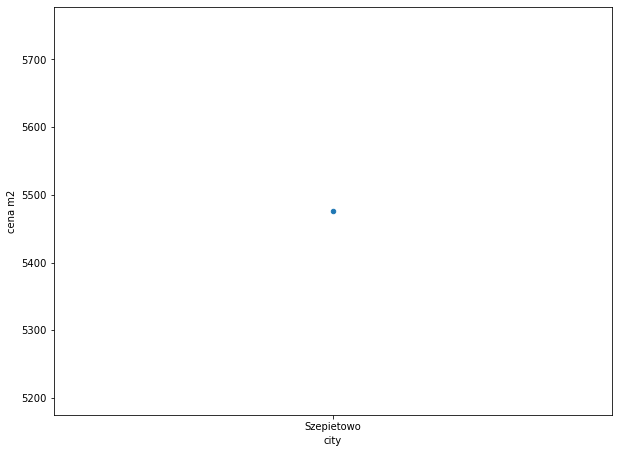

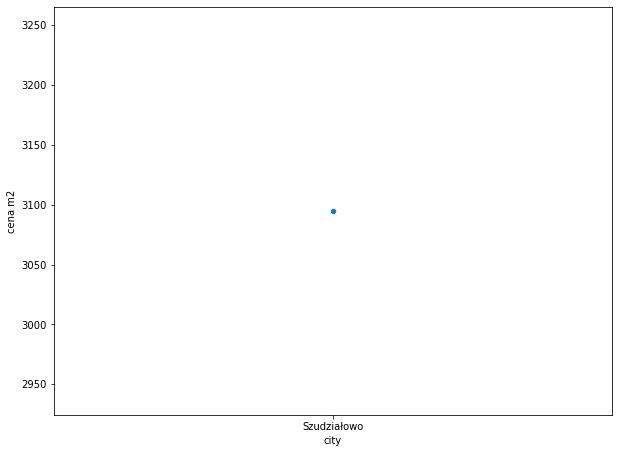

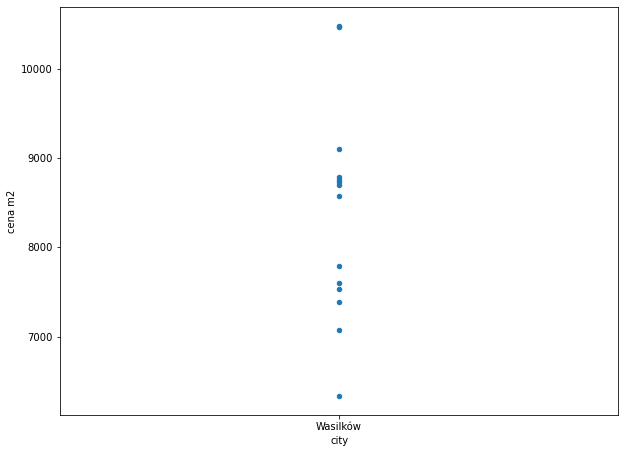

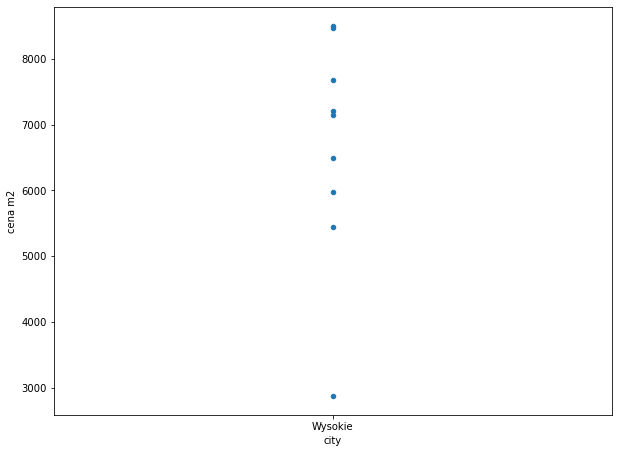

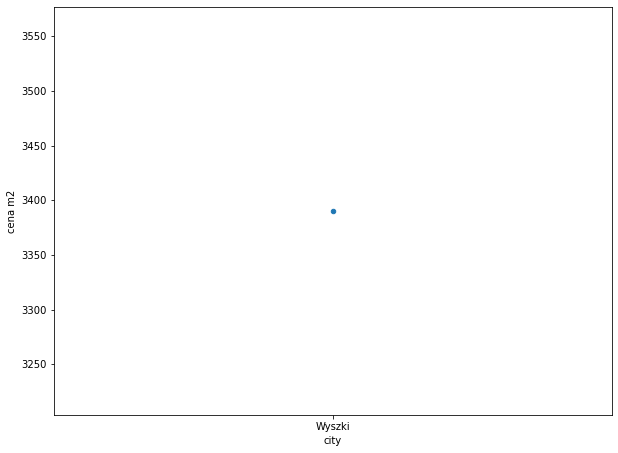

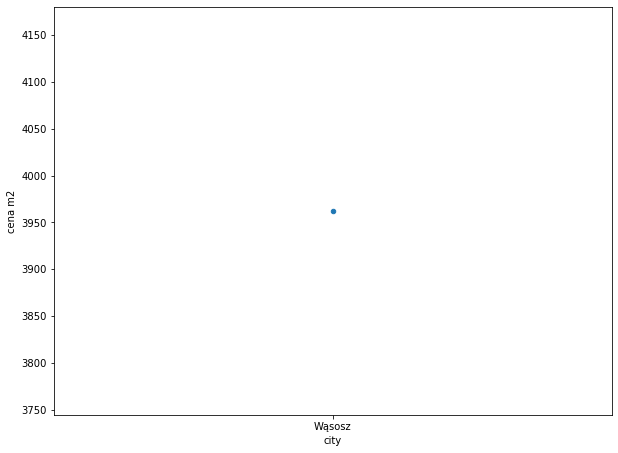

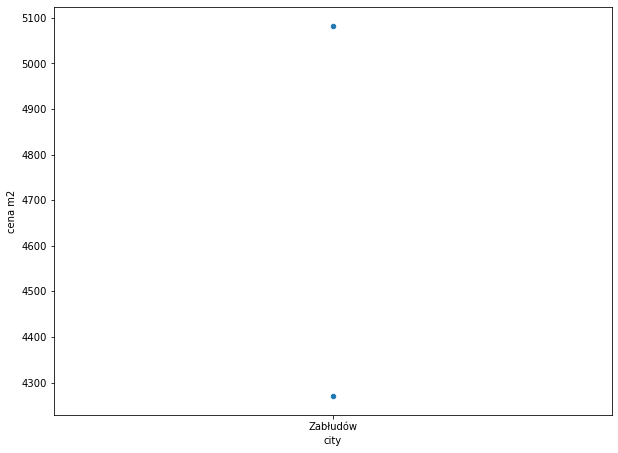

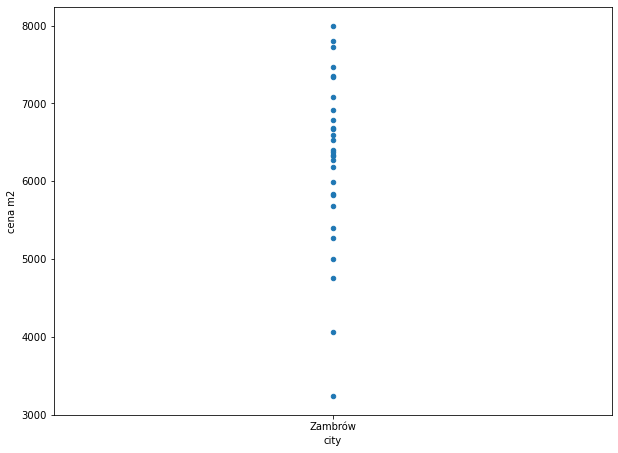

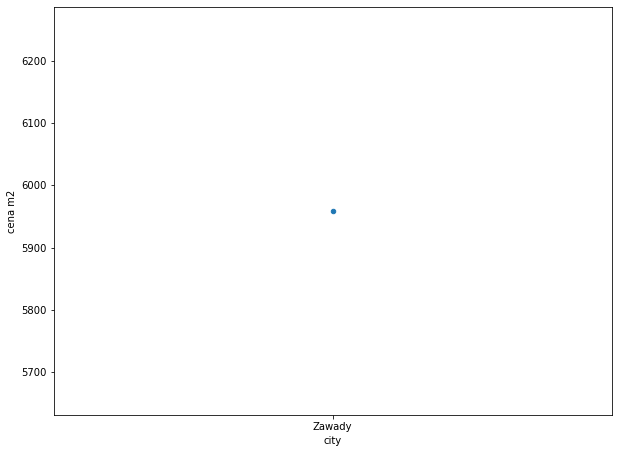

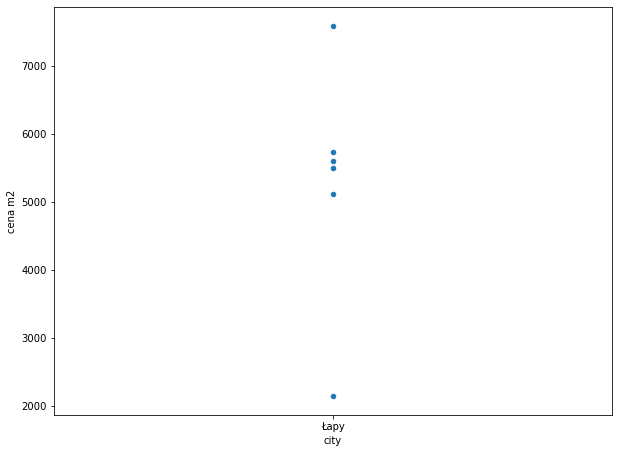

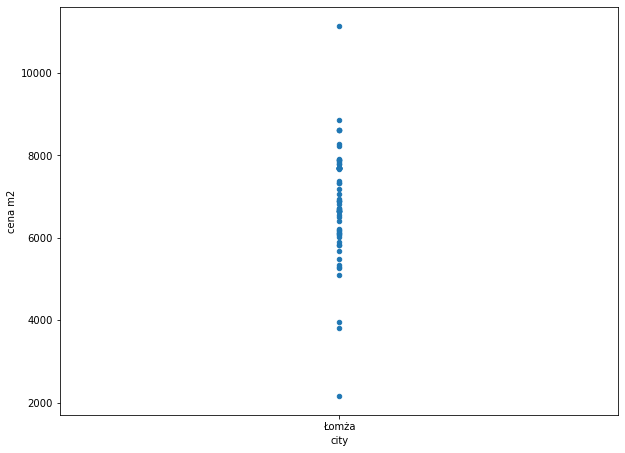

In [38]:
df.groupby("city").plot.scatter(x="city", y="cena m2", 
                     figsize=(10.0, 7.5))

<AxesSubplot:ylabel='city'>

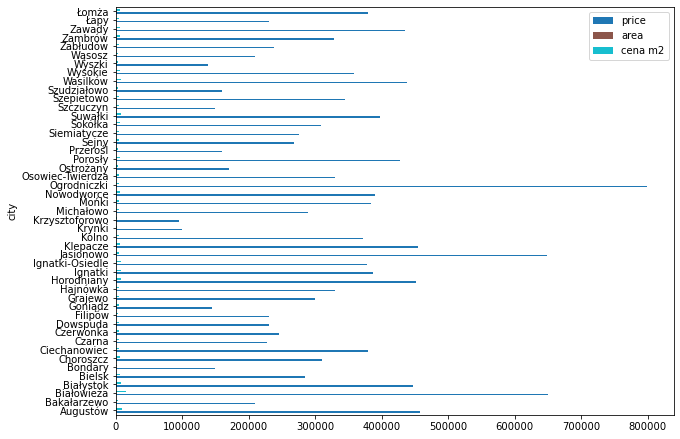

In [41]:
df.groupby("city") \
    .mean() \
    .plot.barh(cmap="tab10", 
               figsize=(10.0, 7.5))

<AxesSubplot:xlabel='area', ylabel='cena m2'>

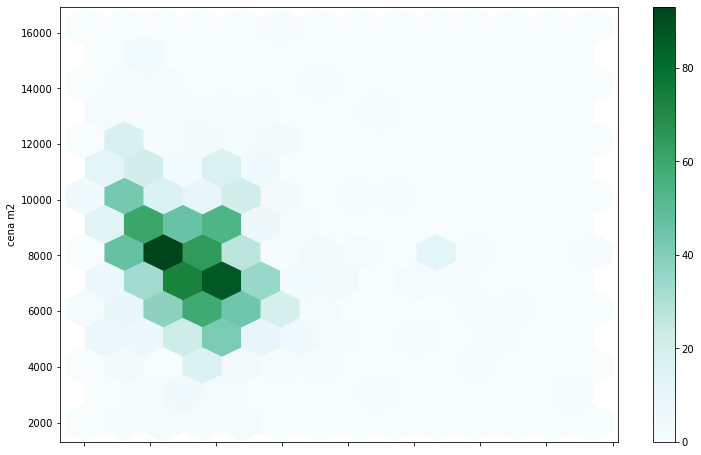

In [45]:
#Stosunek ceny m2 do powierzchni mieszkania
df.plot.hexbin(x="area", y="cena m2", 
                    figsize=(12.5, 8.0), gridsize=(13, 7))

<AxesSubplot:>

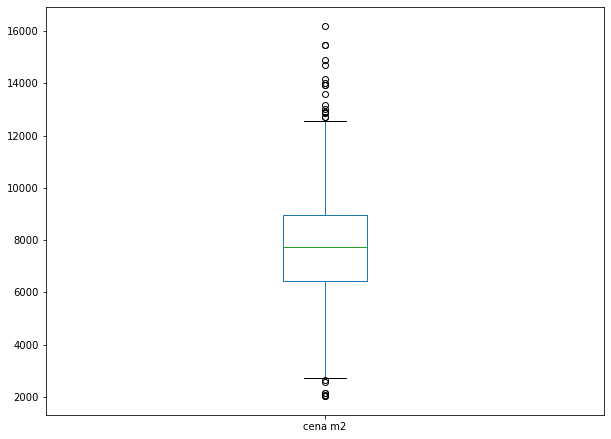

In [47]:
df["cena m2"].plot.box(figsize=(10.0, 7.5))

<AxesSubplot:>

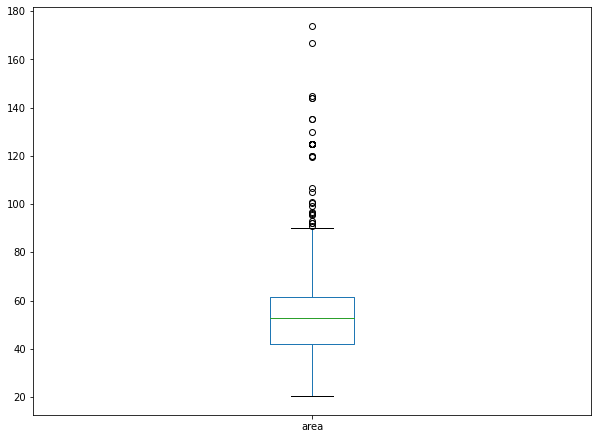

In [48]:
df["area"].plot.box(figsize=(10.0, 7.5))

In [128]:
#grupowanie według wybranej kolumny, wykonanie funkcji agregujących na tej grupie dla pola cena m2
def analyse_column(column_name):
    result = df.groupby(by=[column_name])["cena m2"].agg([
            "mean",  # określenie średniej
            "count",  # określenie liczebności grupy
            #lambda x: sum(1-x),   # liczba kart, które zostały dezaktywowane (0), czyli 1-1=0, czyli aktywnych nie wliczamy
            #lambda x: sum(1-x)/len(x) - 0.16  # odchylenie od średniej globalnej
        ]).sort_values(["mean"], ascending=False)
   #df.loc[df['column_name'] == some_value]
    # nadanie tabeli opisowych nazw kolumn
    # ponieważ po tym kroku byłyby dostępne następujące:
    # mean, count, <lambda_0>, <lambda_1>, które nic nie opisują
    result.columns = [
        "Średnia",
        "Liczba"
    ]
    result = result.loc[result['Liczba'] > 4] #wybieramy miasta, gdzie były więcej niż 4 ogłoszenia
    #result['Średnia'].sort_values(ascending=False)
    return result


In [129]:
import matplotlib.pyplot as plt

def visualize_analysis(df, compare_value):
    plt.figure(figsize=(21,9))  # określenie wymiaru figury (w calach)

    x = df.index.astype(str)  # wartości na osi x
    y = df["Średnia"]  # wartości na osi y

    plt.bar(x, y)  # określenie typu wykresu, jaki chemy wykreślić – tutaj słupkowy

    # stylowanie wykresu
    plt.xlabel("Miasto")  # dodanie legendy dla osi x
    plt.ylabel("Średnia cena m2")  # dodanie legendy dla osi y
    plt.title("Średnia cena mieszkań w miastach")  # nadanie tytułu dla wykresu

    # dodamy również linię poziomą, do której będziemy mogli odnosić poszczególne grupy
    plt.axhline(compare_value, color="red", linestyle="--")

    plt.show()

In [130]:
city_analysis = analyse_column("city")
city_analysis

,Średnia,Liczba
city,,
Augustów,8771.976597,15
Białystok,8552.810387,707
Wasilków,8380.438036,14
Ignatki-Osiedle,7637.688815,5
Suwałki,7595.658679,177
Porosły,7190.137554,13
Choroszcz,6931.033727,11
Łomża,6903.343994,69
Wysokie,6644.555607,9


In [131]:
global_mean = df["cena m2"].mean()  # określenie globalnej ceny za m2 (średniej)
global_mean

7824.144593864463

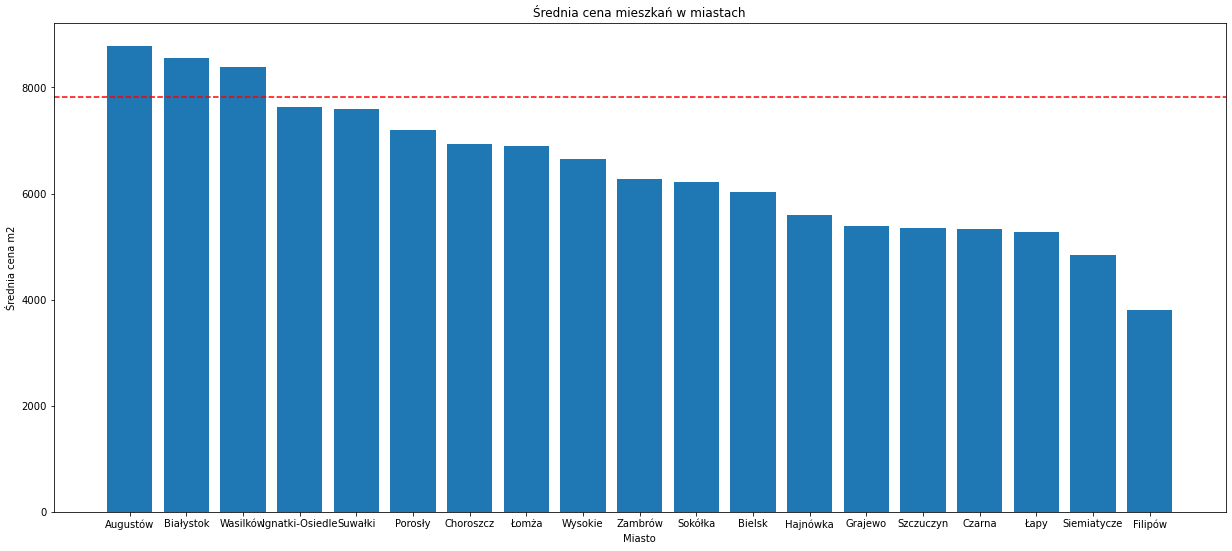

In [132]:
visualize_analysis(city_analysis, global_mean)

In [ ]:
import string

In [16]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
df["title"].map(
    lambda x: x.translate(str.maketrans("", "", string.punctuation))
)

title                      Okazja 3 pokoje w samym centrum
city                          Wysoki parter 3 pokoje cicho
price          Trzy pokojowe mieszkanie przy ul Zapolskiej
area       Mieszkanie na sprzedaż Białystok blisko centrum
4                  Ryska2pokWinda2014rZ Widokiem Na Miasto
                               ...                        
1189     REZERWACJA 52m2 nowe Mieszkanie 3 pokoje ul Pr...
1190            Kawalerka w Centrum po Generalnym Remoncie
1191            Tanie w utrzymaniu dwupokojowe po remoncie
1192                  Mieszkanie dwa pokoje Krzysztoforowo
1193                              ul Stroma  2 pok parter 
Name: title, Length: 1194, dtype: object

In [18]:
words = df["title"].map(
    lambda x: x \
        .translate(str.maketrans("", "", string.punctuation))
        .lower()
        .split()) \
    .explode() \
    .reset_index(drop=True)
words

0       okazja
1            3
2       pokoje
3            w
4        samym
         ...  
6541        ul
6542    stroma
6543         2
6544       pok
6545    parter
Name: title, Length: 6546, dtype: object

In [19]:
words.value_counts() \
    .sort_values(ascending=False) \
    .head(n=10)

mieszkanie    619
pokoje        234
sprzedam      186
3             180
na            168
2             165
w             147
centrum       142
ul            119
pokojowe      114
Name: title, dtype: int64

In [23]:
import wordcloud

In [25]:
word_counts = words.value_counts()
word_counts \
    .sort_values(ascending=False) \
    .head(n=10)

mieszkanie    619
pokoje        234
sprzedam      186
3             180
na            168
2             165
w             147
centrum       142
ul            119
pokojowe      114
Name: title, dtype: int64

In [34]:
word_counts = word_counts[
    (word_counts.index.str.len() > 4) &
    (word_counts >= 3)
]

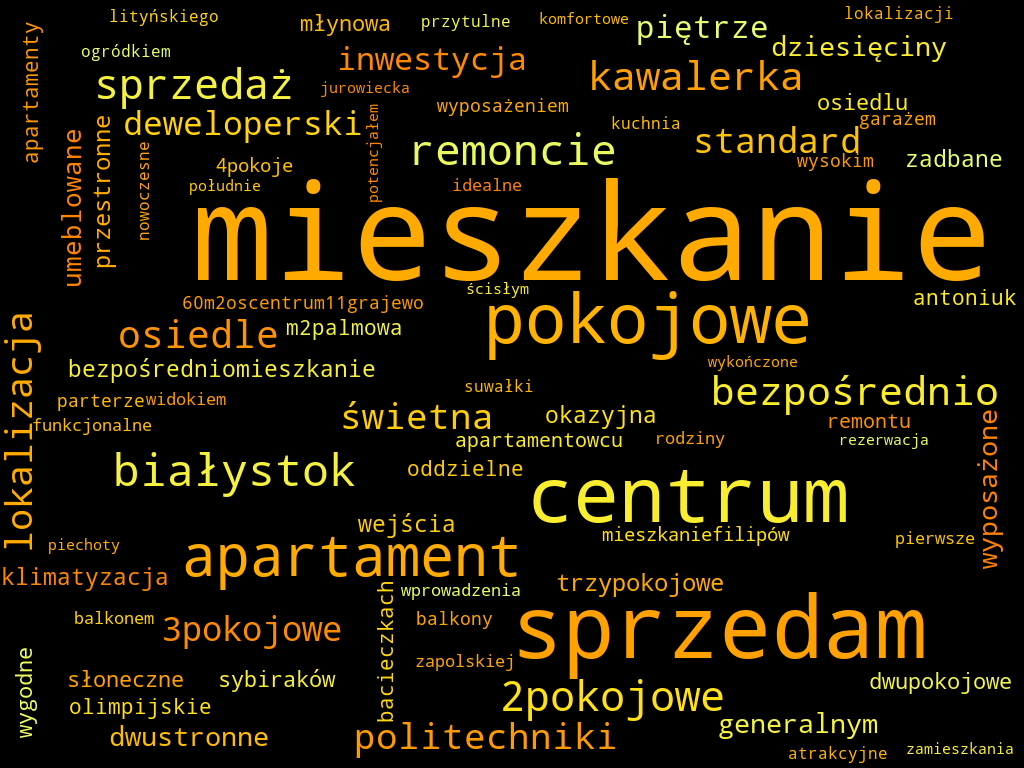

In [35]:
word_cloud = wordcloud.WordCloud(width=1024, height=768, 
                                 colormap="Wistia") \
    .fit_words(dict(zip(word_counts.index, 
                        word_counts.tolist())))
word_cloud.to_image()